*Analize Risk, Hedging, Cost, Benefits and Oportunity on QQQ and IWM using 10Y of data*

### imports

In [94]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from prophet import Prophet

# Exploratory data analysis

Download data

In [2]:
start = '2014-11-19'
end = '2024-11-19'
data = yf.download(['QQQ', 'IWM', '^GSPC'], start=start, end=end) # require data from yf, add S&P to have a 
                                                                  # reference with the market
data.head()

[*********************100%***********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker             IWM        QQQ        ^GSPC         IWM         QQQ   
Date                                                                     
2014-11-19  100.742195  95.313889  2048.719971  115.150002  103.209999   
2014-11-20  101.870773  95.738686  2052.750000  116.440002  103.669998   
2014-11-21  101.993256  95.923393  2063.500000  116.580002  103.870003   
2014-11-24  103.209343  96.671432  2069.409912  117.970001  104.680000   
2014-11-25  103.288078  96.819199  2067.030029  118.059998  104.839996   

Price                          High                                  Low  \
Ticker            ^GSPC         IWM         QQQ        ^GSPC         IWM   
Date                                                                       
2014-11-19  2048.719971  116.250000  103.570000  2052.139893  114.370003   
2014-11-20  2052.750000  116.459999  103.760002  2053.840088  114.620003   
2014-11-21  2063.500000  118.120003  104.690002  2071.459961  116.160004   
2014-11-24  2069.409912  118.050003  104.730003  2070.169922  116.580002   
2014-11-25  2067.030029  118.779999  105.150002  2074.209961  117.529999   

Price                                      Open                           \
Ticker             QQQ        ^GSPC         IWM         QQQ        ^GSPC   
Date                                                                       
2014-11-19  102.730003  2040.369995  116.250000  103.570000  2051.159912   
2014-11-20  102.690002  2040.489990  114.620003  102.769997  2045.869995   
2014-11-21  103.540001  2056.750000  118.080002  104.589996  2057.459961   
2014-11-24  104.059998  2065.070068  116.739998  104.150002  2065.070068   
2014-11-25  104.570000  2064.750000  118.220001  104.839996  2070.149902   

Price         Volume                        
Ticker           IWM       QQQ       ^GSPC  
Date                                        
2014-11-19  38258700  23760200  3390850000  
2014-11-20  26555000  22874000  3128290000  
2014-11-21  43240400  34049100  3916420000  
2014-11-24  24573200  17928300  3128060000  
2014-11-25  26745900  17526000  3392940000

basic statistics

In [3]:
data.describe()

Price     Adj Close                                  Close               \
Ticker          IWM          QQQ        ^GSPC          IWM          QQQ   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     153.976119   233.519438  3310.661673   163.114010   239.317611   
std       38.052014   115.701751  1054.304054    35.338812   114.266859   
min       84.452560    90.186417  1829.079956    94.790001    96.320000   
25%      123.403635   131.161686  2397.805054   135.952503   137.982498   
50%      146.592323   188.844055  2978.025024   157.385002   195.184998   
75%      185.234055   325.396660  4175.270142   190.675003   332.327499   
max      241.699997   514.140015  6001.350098   242.559998   514.140015   

Price                       High                                    Low  \
Ticker        ^GSPC          IWM          QQQ        ^GSPC          IWM   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean    3310.661673   164.408025   241.013645  3327.811027   161.741864   
std     1054.304054    35.696672   115.105093  1059.562649    35.014318   
min     1829.079956    95.400002    97.050003  1847.000000    93.639999   
25%     2397.805054   136.919998   138.630005  2403.242615   134.982506   
50%     2978.025024   158.239998   195.645004  2990.265015   156.364998   
75%     4175.270142   191.877499   334.360001  4195.467407   188.330002   
max     6001.350098   244.460007   515.580017  6017.310059   241.929993   

Price                                    Open                            \
Ticker          QQQ        ^GSPC          IWM          QQQ        ^GSPC   
count   2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     237.376260  3291.229423   163.157874   239.272345  3310.180292   
std      113.336731  1048.490356    35.393576   114.279927  1054.052255   
min       84.739998  1810.099976    94.080002    94.230003  1833.400024   
25%      137.447502  2385.572571   136.197506   138.124996  2394.817566   
50%      193.040001  2963.255005   157.510002   194.395004  2979.320068   
75%      329.212502  4149.300171   190.180004   332.190010  4174.602661   
max      512.409973  5986.689941   243.740005   515.369995  6008.859863   

Price         Volume                              
Ticker           IWM           QQQ         ^GSPC  
count   2.516000e+03  2.516000e+03  2.516000e+03  
mean    2.869014e+07  4.142203e+07  4.001241e+09  
std     1.218854e+07  2.201153e+07  9.540420e+08  
min     1.200000e+03  7.079300e+06  1.296530e+09  
25%     2.034338e+07  2.546135e+07  3.422252e+09  
50%     2.588680e+07  3.628500e+07  3.815925e+09  
75%     3.415128e+07  5.184270e+07  4.337118e+09  
max     9.561280e+07  1.986858e+08  9.976520e+09

check for missing values

In [4]:
# are there missing values?
data.isna().sum()

Price      Ticker
Adj Close  IWM       0
           QQQ       0
           ^GSPC     0
Close      IWM       0
           QQQ       0
           ^GSPC     0
High       IWM       0
           QQQ       0
           ^GSPC     0
Low        IWM       0
           QQQ       0
           ^GSPC     0
Open       IWM       0
           QQQ       0
           ^GSPC     0
Volume     IWM       0
           QQQ       0
           ^GSPC     0
dtype: int64

plot stock prices

<Axes: xlabel='Date'>

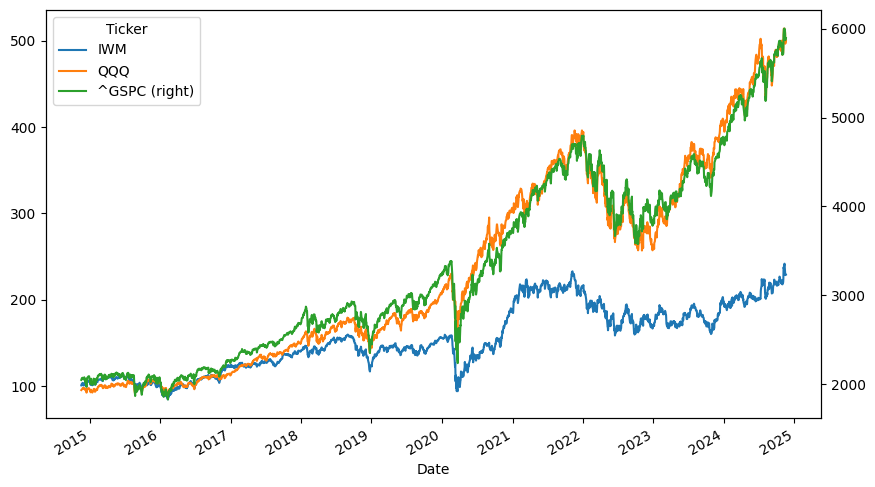

In [5]:
data['Adj Close'].plot(secondary_y='^GSPC', figsize=(10, 6))

plot monthly stock prices

<Axes: xlabel='Date'>

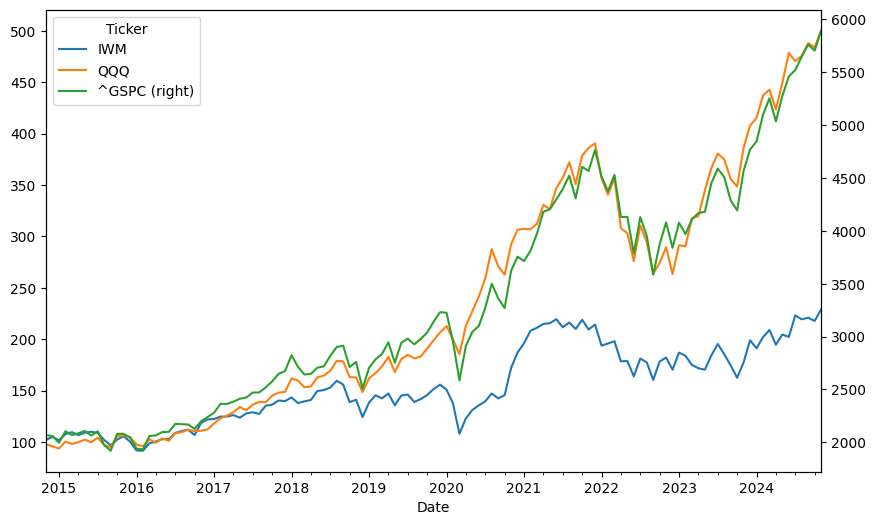

In [6]:
data1m = data.resample('1ME', label='right').last()
data1m['Adj Close'].plot(secondary_y='^GSPC', figsize=(10, 6))

Compute returns

In [7]:
# compute returns
rets = np.log(data / data.shift(1))
rets.head().round(3)

Price      Adj Close                Close                 High                \
Ticker           IWM    QQQ  ^GSPC    IWM    QQQ  ^GSPC    IWM    QQQ  ^GSPC   
Date                                                                           
2014-11-19       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2014-11-20     0.011  0.004  0.002  0.011  0.004  0.002  0.002  0.002  0.001   
2014-11-21     0.001  0.002  0.005  0.001  0.002  0.005  0.014  0.009  0.009   
2014-11-24     0.012  0.008  0.003  0.012  0.008  0.003 -0.001  0.000 -0.001   
2014-11-25     0.001  0.002 -0.001  0.001  0.002 -0.001  0.006  0.004  0.002   

Price         Low                 Open               Volume                
Ticker        IWM    QQQ  ^GSPC    IWM    QQQ  ^GSPC    IWM    QQQ  ^GSPC  
Date                                                                       
2014-11-19    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2014-11-20  0.002 -0.000  0.000 -0.014 -0.008 -0.003 -0.365 -0.038 -0.081  
2014-11-21  0.013  0.008  0.008  0.030  0.018  0.006  0.488  0.398  0.225  
2014-11-24  0.004  0.005  0.004 -0.011 -0.004  0.004 -0.565 -0.641 -0.225  
2014-11-25  0.008  0.005 -0.000  0.013  0.007  0.002  0.085 -0.023  0.081

plot cumulative monthly returns

In [8]:
# plot cumulative monthly returns 
rets['Adj Close'].cumsum().apply(np.exp).resample('1ME', label='right').last().plot(figsize=(10, 6), secondary_y='^GSPC')

<Axes: xlabel='Date'>

plot cumulative weekly returns

<Axes: xlabel='Date'>

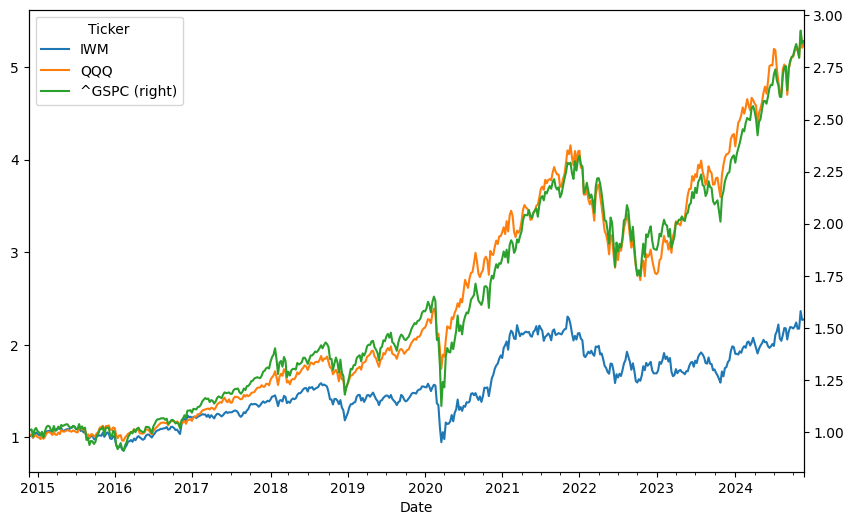

In [9]:
rets['Adj Close'].cumsum().apply(np.exp).resample('1W', label='right').last().plot(figsize=(10, 6), secondary_y='^GSPC')

plot returns

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

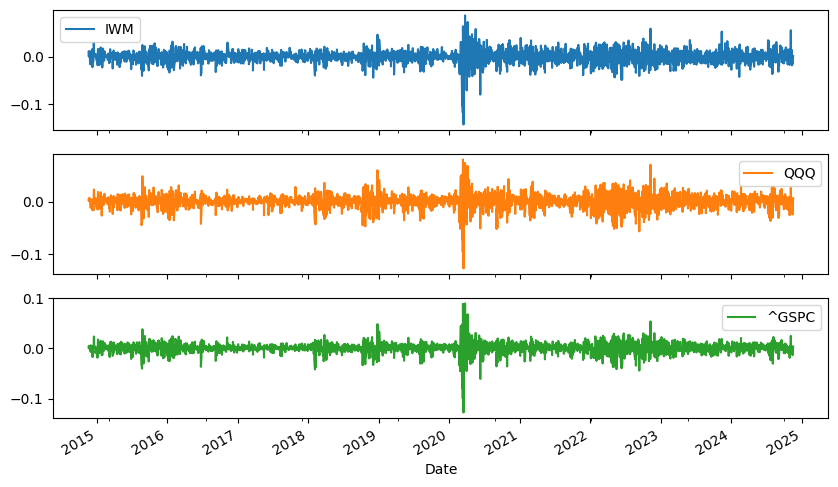

In [10]:
rets.dropna(inplace=True)
rets['Adj Close'].plot(subplots=True, figsize=(10, 6))

plot scatter matrix

array([[<Axes: xlabel='IWM', ylabel='IWM'>,
        <Axes: xlabel='QQQ', ylabel='IWM'>,
        <Axes: xlabel='^GSPC', ylabel='IWM'>],
       [<Axes: xlabel='IWM', ylabel='QQQ'>,
        <Axes: xlabel='QQQ', ylabel='QQQ'>,
        <Axes: xlabel='^GSPC', ylabel='QQQ'>],
       [<Axes: xlabel='IWM', ylabel='^GSPC'>,
        <Axes: xlabel='QQQ', ylabel='^GSPC'>,
        <Axes: xlabel='^GSPC', ylabel='^GSPC'>]], dtype=object)

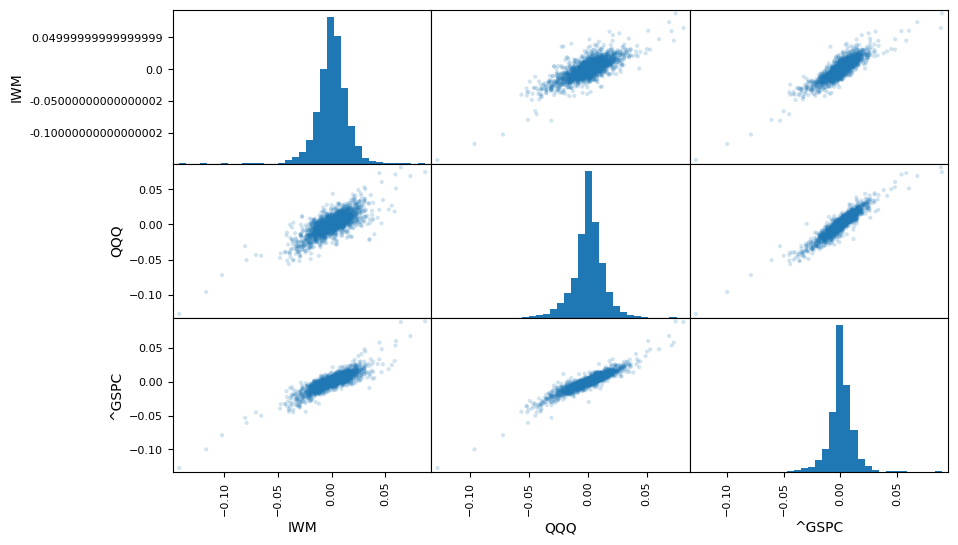

In [11]:
pd.plotting.scatter_matrix(rets['Adj Close'],
                            alpha=0.2,
                            diagonal='hist',
                            hist_kwds={'bins': 35},
                            figsize=(10, 6))

plot return's linear regressions

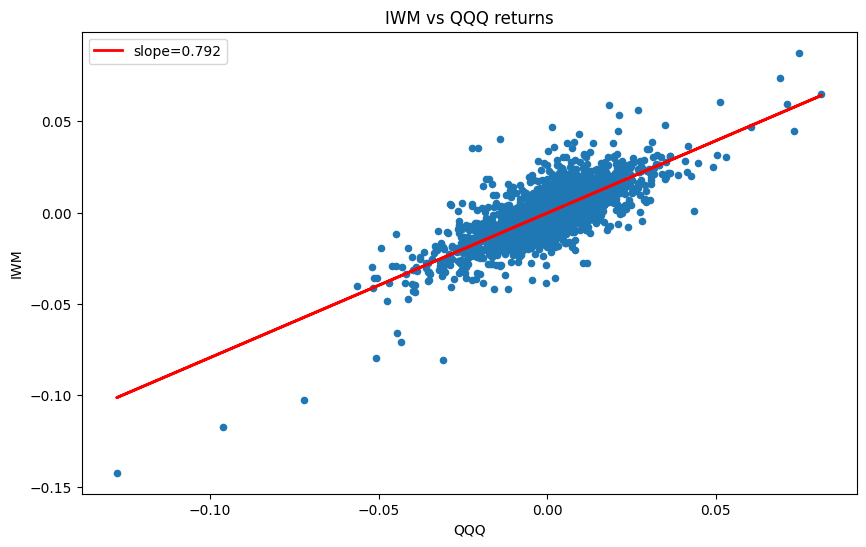

In [12]:
reg = np.polyfit(rets['Adj Close']['QQQ'], rets['Adj Close']['IWM'], deg=1)
ax = rets['Adj Close'].plot(kind='scatter', x='QQQ', y='IWM', figsize=(10, 6))
ax.plot(rets['Adj Close']['QQQ'], np.polyval(reg, rets['Adj Close']['QQQ']), 'r', label=f'slope={round(reg[0],3)}',lw=2)
ax.set_ylabel('IWM')
ax.set_xlabel('QQQ')
ax.set_title('IWM vs QQQ returns')
ax.legend()

compute correlations

In [13]:
rets.Close.corr()

Ticker       IWM       QQQ     ^GSPC
Ticker                              
IWM     1.000000  0.765253  0.867527
QQQ     0.765253  1.000000  0.929141
^GSPC   0.867527  0.929141  1.000000

plot correlations with 20 days rolling window

Text(0.5, 1.0, '20 days RW correlation btw QQQ and IWM')

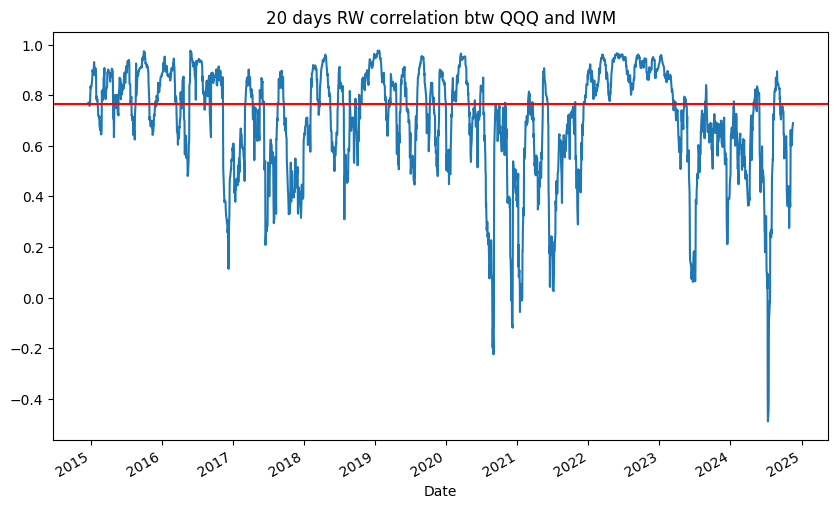

In [14]:
rets = np.log(data / data.shift(1))
rets.dropna(inplace=True)
ax = rets['Adj Close']['QQQ'].rolling(window=20).corr(rets['Adj Close']['IWM']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r')
ax.set_title('20 days RW correlation btw QQQ and IWM')

plot 1M correlations with 20 days rolling window

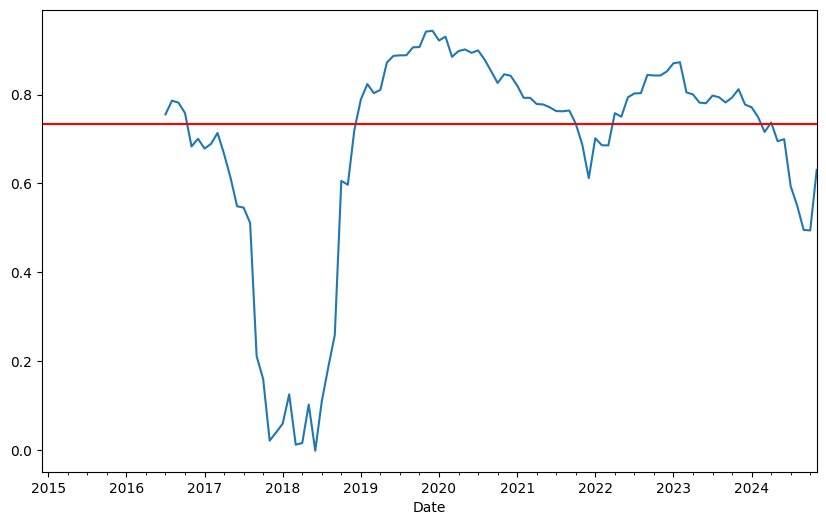

In [15]:
rets1m = np.log(data1m / data1m.shift(1))
rets1m.dropna(inplace=True)
ax = rets1m['Adj Close']['QQQ'].rolling(window=20).corr(rets1m['Adj Close']['IWM']).plot(figsize=(10, 6))
ax.axhline(rets1m.corr().iloc[0, 1], c='r')

compute 1m corr

In [16]:
rets1m['Adj Close'].corr()

Ticker       IWM       QQQ     ^GSPC
Ticker                              
IWM     1.000000  0.734927  0.861865
QQQ     0.734927  1.000000  0.919627
^GSPC   0.861865  0.919627  1.000000

explore autocorrelation

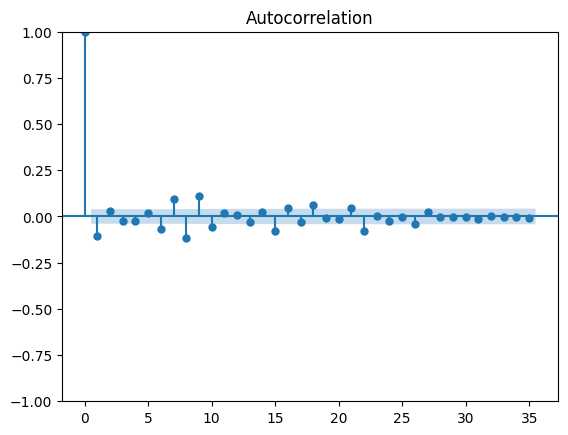

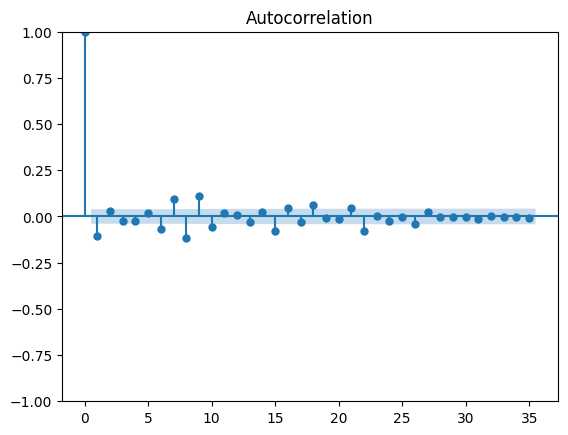

In [17]:
plot_acf(rets['Adj Close'].QQQ)

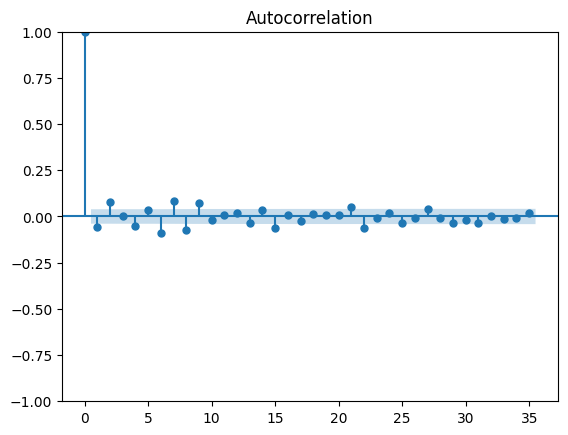

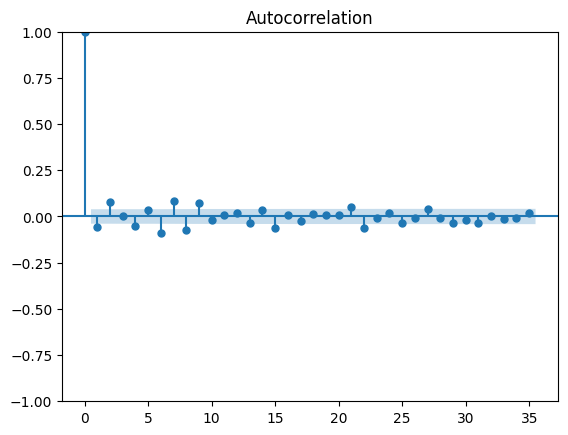

In [18]:
plot_acf(rets['Adj Close'].IWM)

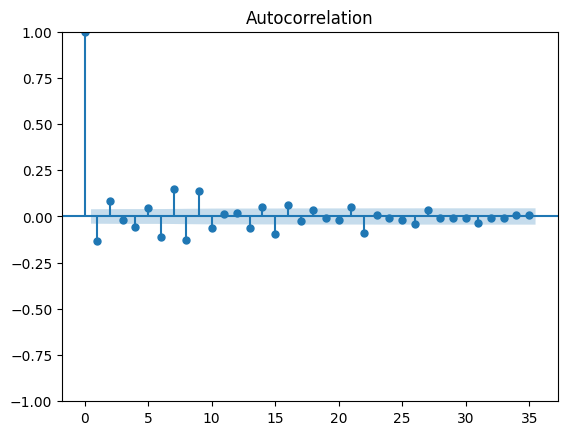

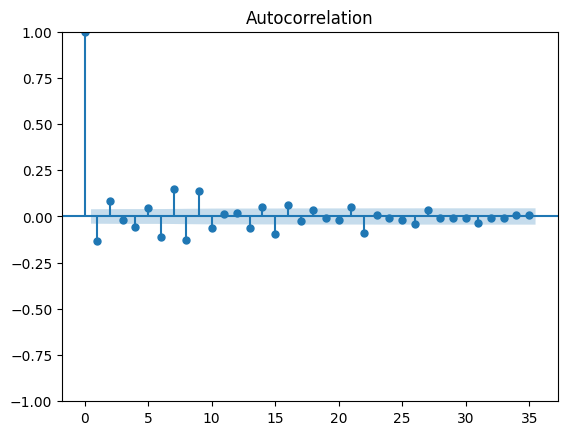

In [19]:
plot_acf(rets['Adj Close']["^GSPC"])

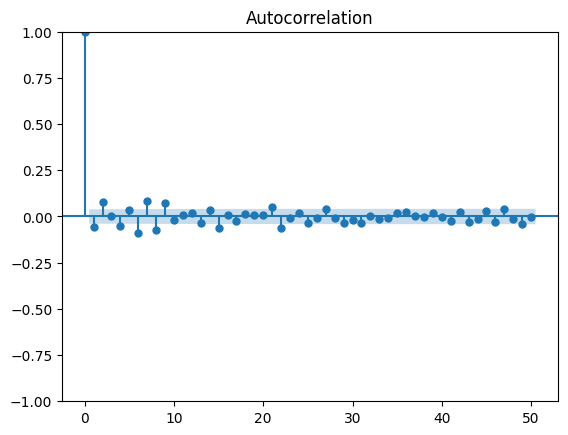

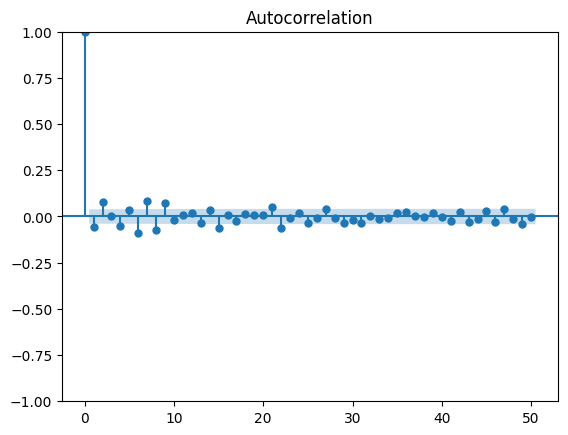

In [20]:
plot_acf(rets['Adj Close'].IWM,lags=50)

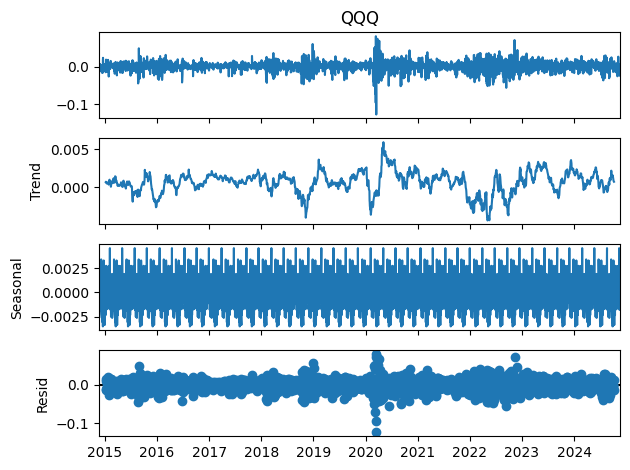

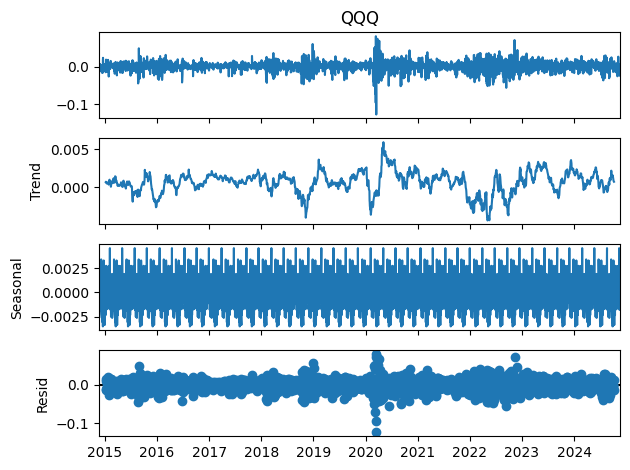

In [21]:
result = seasonal_decompose(rets['Adj Close'].QQQ,period=60)
result.plot()

explore volatility

Text(0.5, 1.0, 'Volatility')

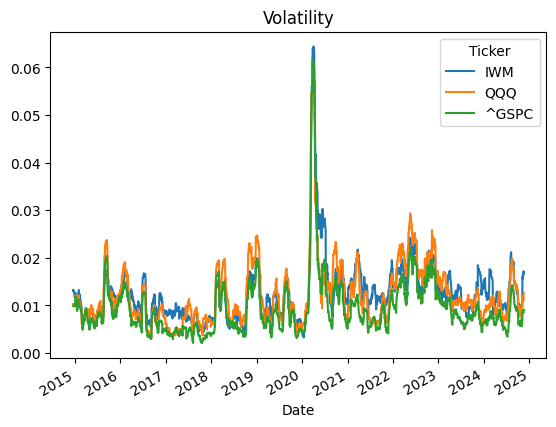

In [22]:
rets.rolling(window=20).std()['Adj Close'].plot()
plt.title('Volatility')

In [23]:
pd.options.plotting.backend = "plotly"
rets['Adj Close'].cumsum().plot()

In [24]:
rets.rolling(window=20).std()['Adj Close'].plot()

In [25]:
df = pd.DataFrame()
df['ds'] = rets['Adj Close'].QQQ.index[:-252]
df['y'] = rets['Adj Close'].QQQ.values.cumsum()[:-252]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2263 non-null   datetime64[ns]
 1   y       2263 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB


In [26]:
m = Prophet(changepoint_prior_scale = 0.05,
            weekly_seasonality = False,
            daily_seasonality = False,
            yearly_seasonality = True,
            changepoints = None)
m.add_seasonality(name='monthly',period=30.5,fourier_order=5)
m.fit(df)

17:51:18 - cmdstanpy - INFO - Chain [1] start processing
17:51:18 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=252,freq='B')
future.tail()

ds
2510 2024-10-29
2511 2024-10-30
2512 2024-10-31
2513 2024-11-01
2514 2024-11-04

In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2510 2024-10-29  1.249344    1.111841    1.390212
2511 2024-10-30  1.250407    1.117968    1.397059
2512 2024-10-31  1.250850    1.119115    1.395080
2513 2024-11-01  1.251492    1.105105    1.402136
2514 2024-11-04  1.256124    1.125500    1.401550

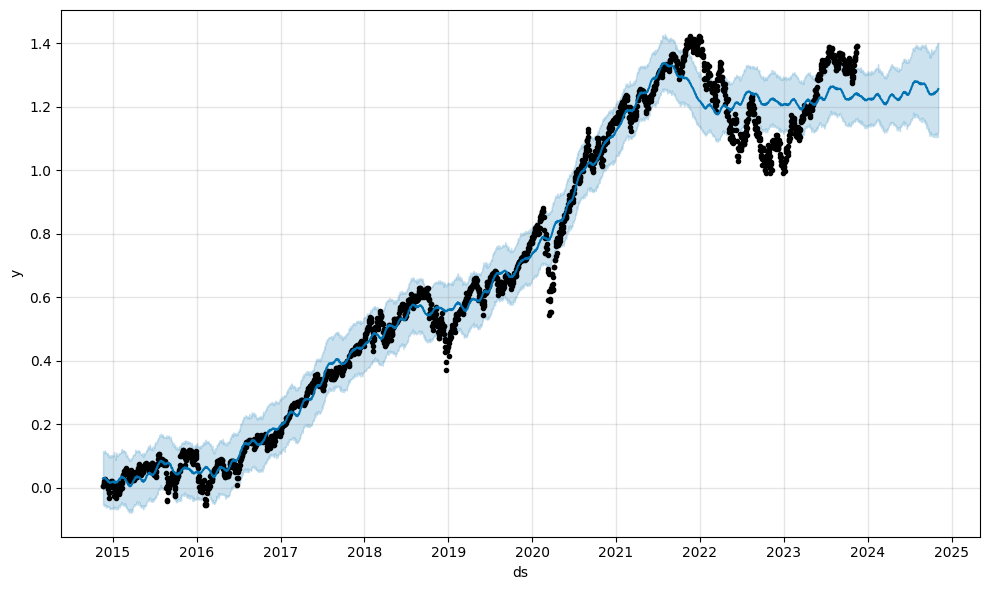

In [29]:
fig1 = m.plot(forecast)

In [30]:
df2 = pd.merge(rets['Adj Close'].QQQ.cumsum(), forecast, how='inner', right_on='ds', left_index=True)
df2

QQQ         ds     trend  yhat_lower  yhat_upper  trend_lower  \
0     0.004447 2014-11-20  0.025797   -0.053207    0.116322     0.025797   
1     0.006374 2014-11-21  0.025879   -0.050004    0.109573     0.025879   
2     0.014142 2014-11-24  0.026126   -0.057843    0.115576     0.026126   
3     0.015670 2014-11-25  0.026209   -0.050813    0.108728     0.026209   
4     0.022135 2014-11-26  0.026291   -0.051835    0.109930     0.026291   
...        ...        ...       ...         ...         ...          ...   
2510  1.657753 2024-10-29  1.248520    1.111841    1.390212     1.149387   
2511  1.650166 2024-10-30  1.248565    1.117968    1.397059     1.148836   
2512  1.624599 2024-10-31  1.248609    1.119115    1.395080     1.147690   
2513  1.631971 2024-11-01  1.248653    1.105105    1.402136     1.146544   
2514  1.629054 2024-11-04  1.248787    1.125500    1.401550     1.145486   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        0.025797        0.004130              0.004130              0.004130   
1        0.025879        0.004893              0.004893              0.004893   
2        0.026126        0.004296              0.004296              0.004296   
3        0.026209        0.004206              0.004206              0.004206   
4        0.026291        0.004843              0.004843              0.004843   
...           ...             ...                   ...                   ...   
2510     1.357842        0.000823              0.000823              0.000823   
2511     1.358247        0.001843              0.001843              0.001843   
2512     1.358896        0.002241              0.002241              0.002241   
2513     1.360043        0.002838              0.002838              0.002838   
2514     1.360799        0.007337              0.007337              0.007337   

       monthly  monthly_lower  monthly_upper    yearly  yearly_lower  \
0    -0.002675      -0.002675      -0.002675  0.006806      0.006806   
1    -0.001593      -0.001593      -0.001593  0.006486      0.006486   
2    -0.000911      -0.000911      -0.000911  0.005207      0.005207   
3    -0.000475      -0.000475      -0.000475  0.004680      0.004680   
4     0.000735       0.000735       0.000735  0.004108      0.004108   
...        ...            ...            ...       ...           ...   
2510 -0.001098      -0.001098      -0.001098  0.001922      0.001922   
2511 -0.000676      -0.000676      -0.000676  0.002518      0.002518   
2512 -0.000851      -0.000851      -0.000851  0.003093      0.003093   
2513 -0.000804      -0.000804      -0.000804  0.003643      0.003643   
2514  0.002213       0.002213       0.002213  0.005124      0.005124   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         0.006806                   0.0                         0.0   
1         0.006486                   0.0                         0.0   
2         0.005207                   0.0                         0.0   
3         0.004680                   0.0                         0.0   
4         0.004108                   0.0                         0.0   
...            ...                   ...                         ...   
2510      0.001922                   0.0                         0.0   
2511      0.002518                   0.0                         0.0   
2512      0.003093                   0.0                         0.0   
2513      0.003643                   0.0                         0.0   
2514      0.005124                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.029927  
1                            0.0  0.030773  
2                            0.0  0.030422  
3                            0.0  0.030414  
4                            0.0  0.031134  
...                          ...       ...  
2510                         0.0  1.249344  
2511                         0.0  1

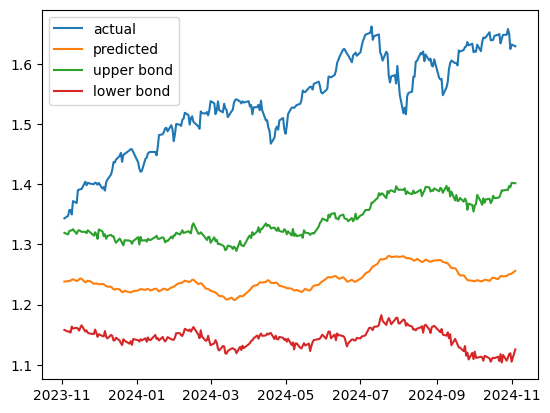

In [31]:
plt.plot(df2.ds[-252:], df2.QQQ[-252:], label='actual')
plt.plot(df2.ds[-252:], df2.yhat[-252:], label='predicted')
plt.plot(df2.ds[-252:], df2.yhat_upper[-252:], label='upper bond')
plt.plot(df2.ds[-252:], df2.yhat_lower[-252:], label='lower bond')
plt.legend()

In [32]:
df = pd.DataFrame()
df['ds'] = data['Adj Close'].QQQ.index[:-252]
df['y'] = data['Adj Close'].QQQ.values[:-252]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2264 non-null   datetime64[ns]
 1   y       2264 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.5 KB


In [33]:
m = Prophet(changepoint_prior_scale = 0.05,
            weekly_seasonality = False,
            daily_seasonality = False,
            yearly_seasonality = True,
            changepoints = None)
m.add_seasonality(name='monthly',period=30.5,fourier_order=5)
m.fit(df)

17:51:20 - cmdstanpy - INFO - Chain [1] start processing
17:51:21 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=252,freq='B')
future.tail()

ds
2511 2024-10-29
2512 2024-10-30
2513 2024-10-31
2514 2024-11-01
2515 2024-11-04

In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2511 2024-10-29  336.868332  301.382801  376.020234
2512 2024-10-30  337.401130  303.636154  376.160404
2513 2024-10-31  337.708589  303.507741  377.175614
2514 2024-11-01  337.936212  302.100090  378.628091
2515 2024-11-04  339.152922  300.437108  377.963890

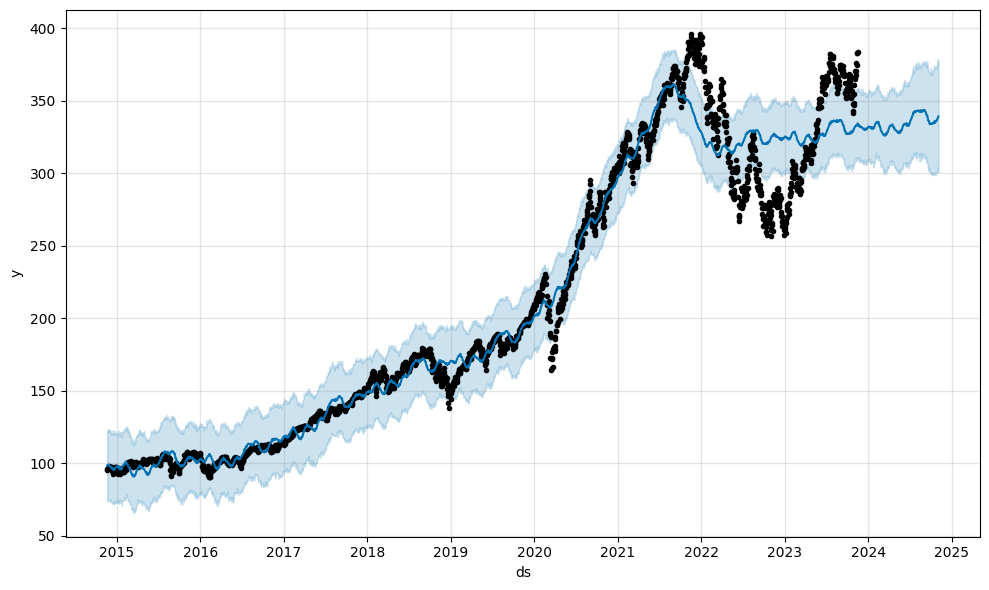

In [36]:
fig1 = m.plot(forecast)

In [37]:
df2 = pd.merge(data['Adj Close'].QQQ, forecast, how='inner', right_on='ds', left_index=True)
df2

QQQ         ds       trend  yhat_lower  yhat_upper  trend_lower  \
0      95.313889 2014-11-19   96.542672   75.227166  122.402694    96.542672   
1      95.738686 2014-11-20   96.556436   73.521220  121.016513    96.556436   
2      95.923393 2014-11-21   96.570199   75.334495  123.314237    96.570199   
3      96.671432 2014-11-24   96.611490   74.173677  123.362123    96.611490   
4      96.819199 2014-11-25   96.625253   74.871712  122.294366    96.625253   
...          ...        ...         ...         ...         ...          ...   
2511  500.160004 2024-10-29  337.366870  301.382801  376.020234   310.515340   
2512  496.380005 2024-10-30  337.385887  303.636154  376.160404   310.317093   
2513  483.850006 2024-10-31  337.404905  303.507741  377.175614   310.171100   
2514  487.429993 2024-11-01  337.423922  302.100090  378.628091   310.025315   
2515  486.010010 2024-11-04  337.480975  300.437108  377.963890   309.917566   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0       96.542672        1.611365              1.611365              1.611365   
1       96.556436        1.614951              1.614951              1.614951   
2       96.570199        1.929025              1.929025              1.929025   
3       96.611490        2.198899              2.198899              2.198899   
4       96.625253        2.088088              2.088088              2.088088   
...           ...             ...                   ...                   ...   
2511   367.437757       -0.498537             -0.498537             -0.498537   
2512   367.589245        0.015243              0.015243              0.015243   
2513   367.778336        0.303684              0.303684              0.303684   
2514   367.986214        0.512290              0.512290              0.512290   
2515   368.194668        1.671946              1.671946              1.671946   

       monthly  monthly_lower  monthly_upper    yearly  yearly_lower  \
0    -1.040418      -1.040418      -1.040418  2.651783      2.651783   
1    -0.990277      -0.990277      -0.990277  2.605228      2.605228   
2    -0.606136      -0.606136      -0.606136  2.535161      2.535161   
3     0.007176       0.007176       0.007176  2.191724      2.191724   
4     0.050859       0.050859       0.050859  2.037228      2.037228   
...        ...            ...            ...       ...           ...   
2511 -0.387002      -0.387002      -0.387002 -0.111535     -0.111535   
2512 -0.075708      -0.075708      -0.075708  0.090951      0.090951   
2513  0.009020       0.009020       0.009020  0.294665      0.294665   
2514  0.013521       0.013521       0.013521  0.498769      0.498769   
2515  0.569061       0.569061       0.569061  1.102885      1.102885   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         2.651783                   0.0                         0.0   
1         2.605228                   0.0                         0.0   
2         2.535161                   0.0                         0.0   
3         2.191724                   0.0                         0.0   
4         2.037228                   0.0                         0.0   
...            ...                   ...                         ...   
2511     -0.111535                   0.0                         0.0   
2512      0.090951                   0.0                         0.0   
2513      0.294665                   0.0                         0.0   
2514      0.498769                   0.0                         0.0   
2515      1.102885                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   98.154037  
1                            0.0   98.171387  
2                            0.0   98.499224  
3                            0.0   98.810389  
4                            0.0   98.713341  
...                          ...         ...  
2511                

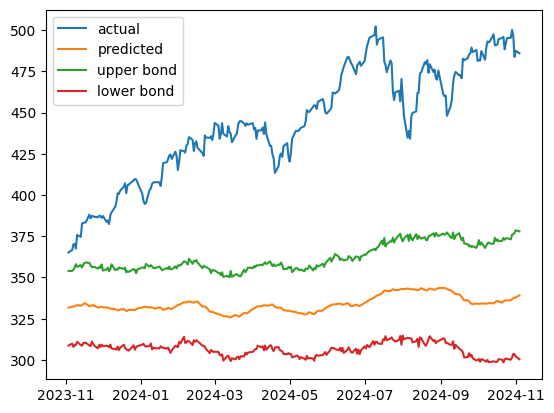

In [38]:
plt.plot(df2.ds[-252:], df2.QQQ[-252:], label='actual')
plt.plot(df2.ds[-252:], df2.yhat[-252:], label='predicted')
plt.plot(df2.ds[-252:], df2.yhat_upper[-252:], label='upper bond')
plt.plot(df2.ds[-252:], df2.yhat_lower[-252:], label='lower bond')
plt.legend()

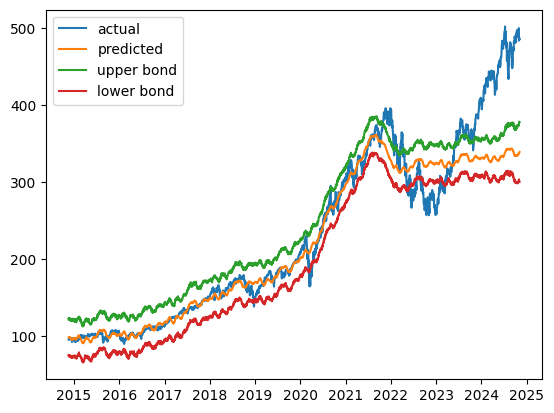

In [39]:
plt.plot(df2.ds, df2.QQQ, label='actual')
plt.plot(df2.ds, df2.yhat, label='predicted')
plt.plot(df2.ds, df2.yhat_upper, label='upper bond')
plt.plot(df2.ds, df2.yhat_lower, label='lower bond')
plt.legend()

In [40]:
df.tail()

ds           y
2259 2023-11-10  375.812500
2260 2023-11-13  374.640503
2261 2023-11-14  382.705200
2262 2023-11-15  382.993225
2263 2023-11-16  383.320984

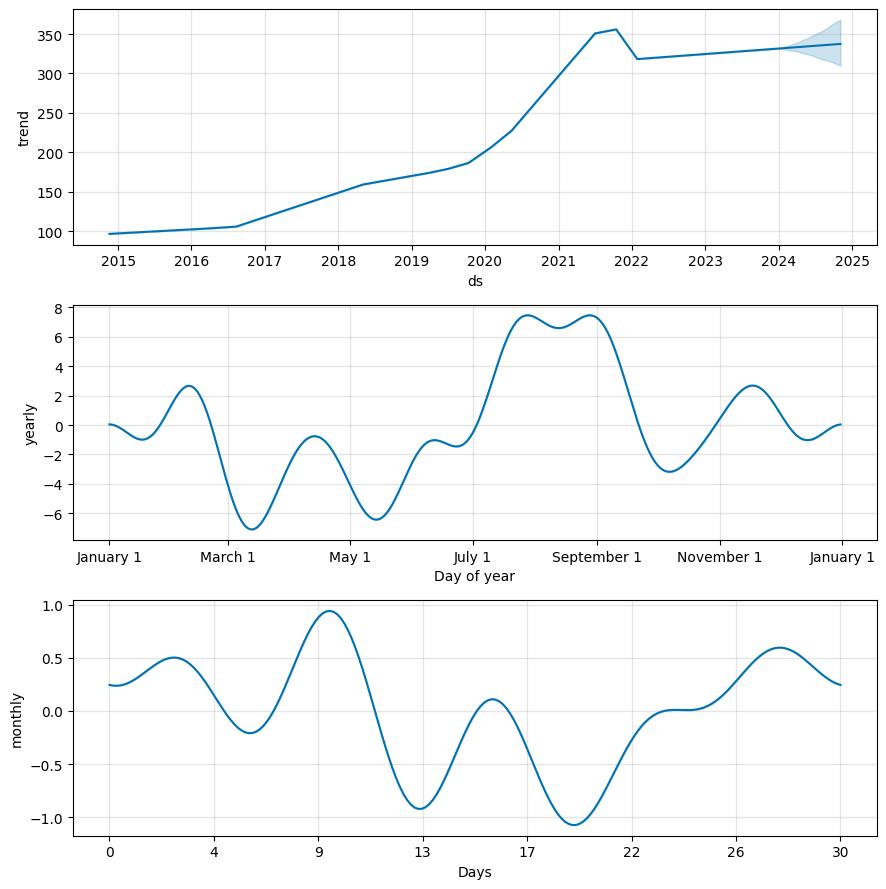

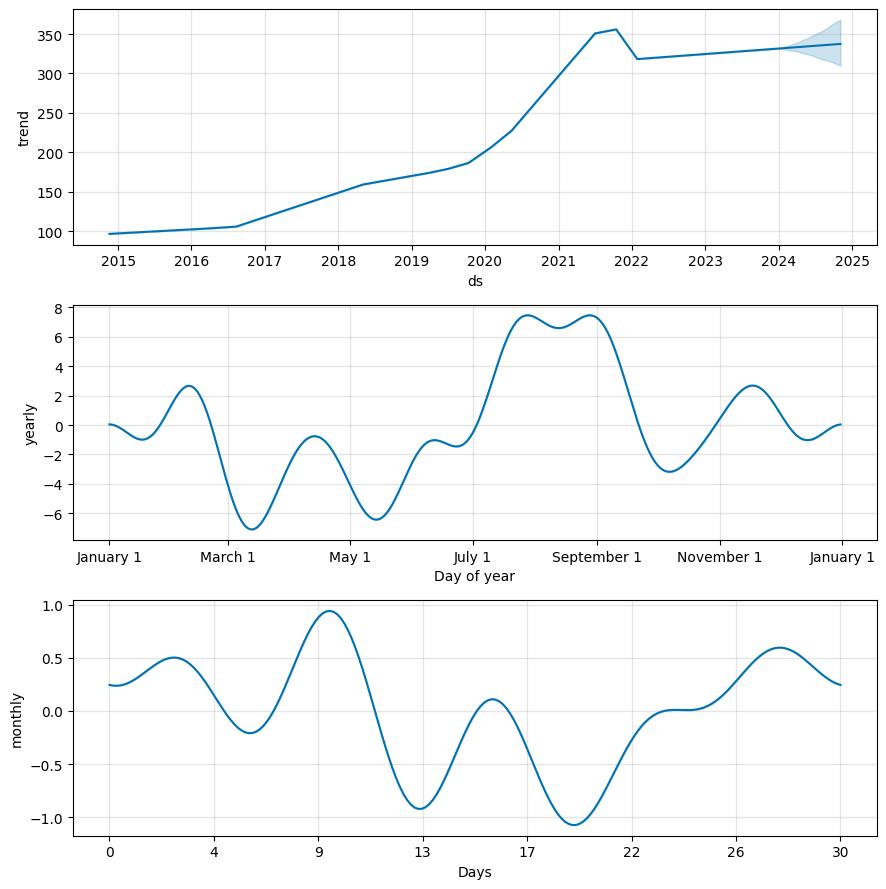

In [41]:
m.plot_components(df2)

In [42]:
df = pd.DataFrame()
df['ds'] = rets['Adj Close'].QQQ.index[:-60]
df['y'] = rets['Adj Close'].QQQ.values.cumsum()[:-60]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2455 non-null   datetime64[ns]
 1   y       2455 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.5 KB


In [43]:
m = Prophet(changepoint_prior_scale = 0.05,
            weekly_seasonality = False,
            daily_seasonality = False,
            yearly_seasonality = True,
            changepoints = None)
m.add_seasonality(name='monthly',period=30.5,fourier_order=5)
m.fit(df)

17:51:23 - cmdstanpy - INFO - Chain [1] start processing
17:51:24 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = m.make_future_dataframe(periods=60,freq='B')
future.tail()

ds
2510 2024-11-11
2511 2024-11-12
2512 2024-11-13
2513 2024-11-14
2514 2024-11-15

In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2510 2024-11-11  1.701493    1.644473    1.760776
2511 2024-11-12  1.701070    1.646657    1.757013
2512 2024-11-13  1.701185    1.645143    1.757745
2513 2024-11-14  1.702997    1.647162    1.760325
2514 2024-11-15  1.706145    1.647838    1.762649

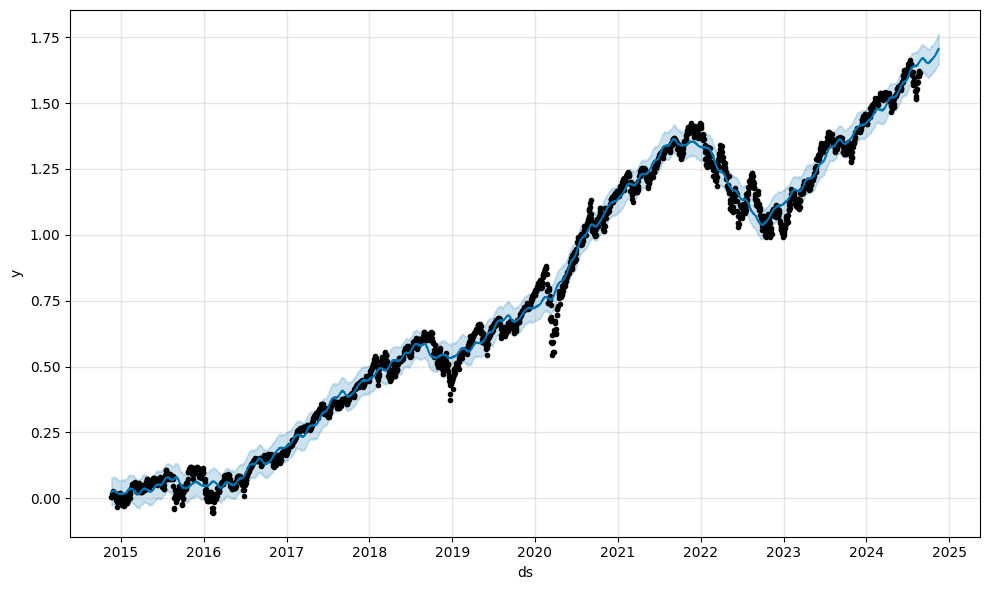

In [46]:
fig1 = m.plot(forecast)

In [47]:
df2 = pd.merge(rets['Adj Close'].QQQ.cumsum(), forecast, how='inner', right_on='ds', left_index=True)
df2

QQQ         ds     trend  yhat_lower  yhat_upper  trend_lower  \
0     0.004447 2014-11-20  0.019768   -0.026338    0.072855     0.019768   
1     0.006374 2014-11-21  0.019934   -0.023766    0.080615     0.019934   
2     0.014142 2014-11-24  0.020431   -0.027996    0.076598     0.020431   
3     0.015670 2014-11-25  0.020597   -0.023317    0.076062     0.020597   
4     0.022135 2014-11-26  0.020763   -0.024372    0.077852     0.020763   
...        ...        ...       ...         ...         ...          ...   
2510  1.684736 2024-11-11  1.699434    1.644473    1.760776     1.689478   
2511  1.682925 2024-11-12  1.700275    1.646657    1.757013     1.690016   
2512  1.681637 2024-11-13  1.701116    1.645143    1.757745     1.690243   
2513  1.674663 2024-11-14  1.701957    1.647162    1.760325     1.690187   
2514  1.650549 2024-11-15  1.702798    1.647838    1.762649     1.690643   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        0.019768        0.004302              0.004302              0.004302   
1        0.019934        0.004980              0.004980              0.004980   
2        0.020431        0.004747              0.004747              0.004747   
3        0.020597        0.005769              0.005769              0.005769   
4        0.020763        0.007242              0.007242              0.007242   
...           ...             ...                   ...                   ...   
2510     1.708841        0.002059              0.002059              0.002059   
2511     1.710173        0.000795              0.000795              0.000795   
2512     1.711481        0.000069              0.000069              0.000069   
2513     1.712618        0.001040              0.001040              0.001040   
2514     1.713793        0.003347              0.003347              0.003347   

       monthly  monthly_lower  monthly_upper    yearly  yearly_lower  \
0    -0.000999      -0.000999      -0.000999  0.005301      0.005301   
1    -0.000702      -0.000702      -0.000702  0.005681      0.005681   
2    -0.001630      -0.001630      -0.001630  0.006377      0.006377   
3    -0.000685      -0.000685      -0.000685  0.006454      0.006454   
4     0.000790       0.000790       0.000790  0.006452      0.006452   
...        ...            ...            ...       ...           ...   
2510  0.002183       0.002183       0.002183 -0.000124     -0.000124   
2511  0.000148       0.000148       0.000148  0.000647      0.000647   
2512 -0.001330      -0.001330      -0.001330  0.001399      0.001399   
2513 -0.001084      -0.001084      -0.001084  0.002123      0.002123   
2514  0.000534       0.000534       0.000534  0.002813      0.002813   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         0.005301                   0.0                         0.0   
1         0.005681                   0.0                         0.0   
2         0.006377                   0.0                         0.0   
3         0.006454                   0.0                         0.0   
4         0.006452                   0.0                         0.0   
...            ...                   ...                         ...   
2510     -0.000124                   0.0                         0.0   
2511      0.000647                   0.0                         0.0   
2512      0.001399                   0.0                         0.0   
2513      0.002123                   0.0                         0.0   
2514      0.002813                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.024070  
1                            0.0  0.024914  
2                            0.0  0.025178  
3                            0.0  0.026366  
4                            0.0  0.028005  
...                          ...       ...  
2510                         0.0  1.701493  
2511                         0.0  1

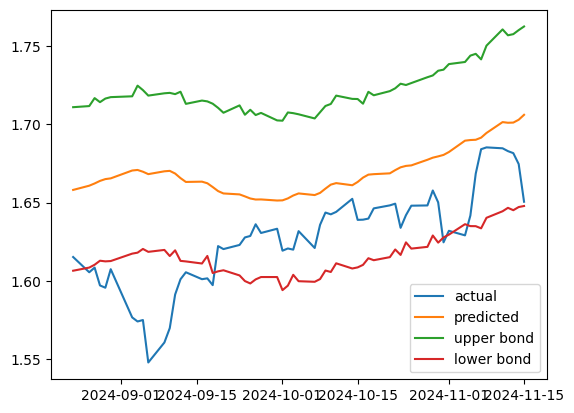

In [48]:
plt.plot(df2.ds[-60:], df2.QQQ[-60:], label='actual')
plt.plot(df2.ds[-60:], df2.yhat[-60:], label='predicted')
plt.plot(df2.ds[-60:], df2.yhat_upper[-60:], label='upper bond')
plt.plot(df2.ds[-60:], df2.yhat_lower[-60:], label='lower bond')
plt.legend()

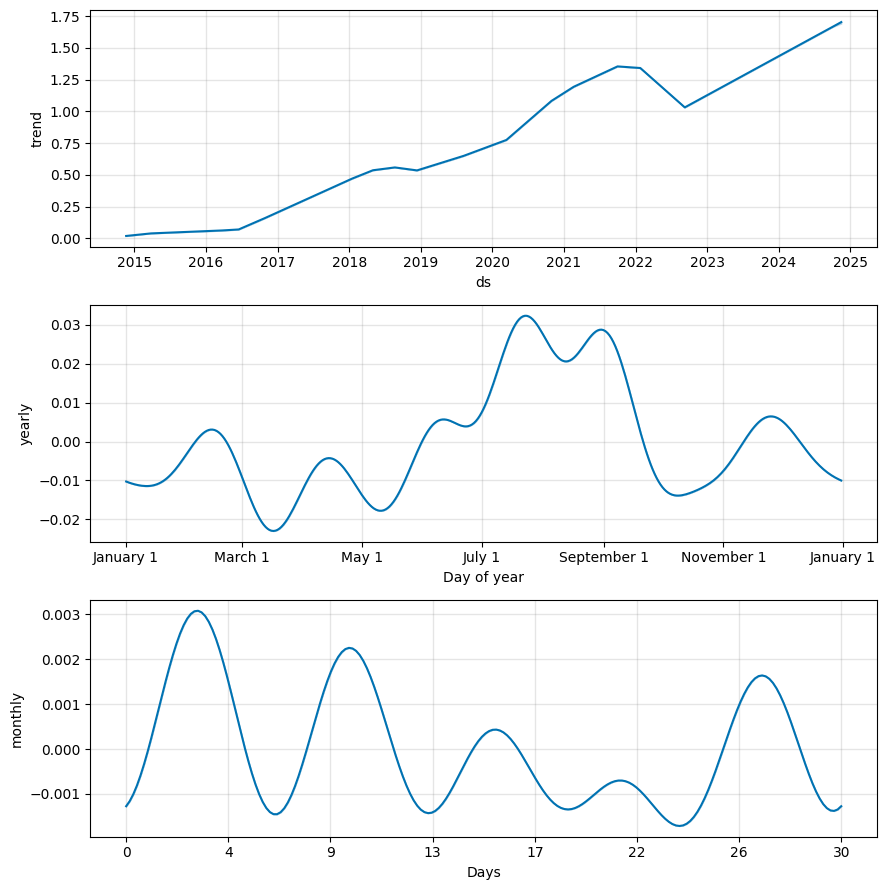

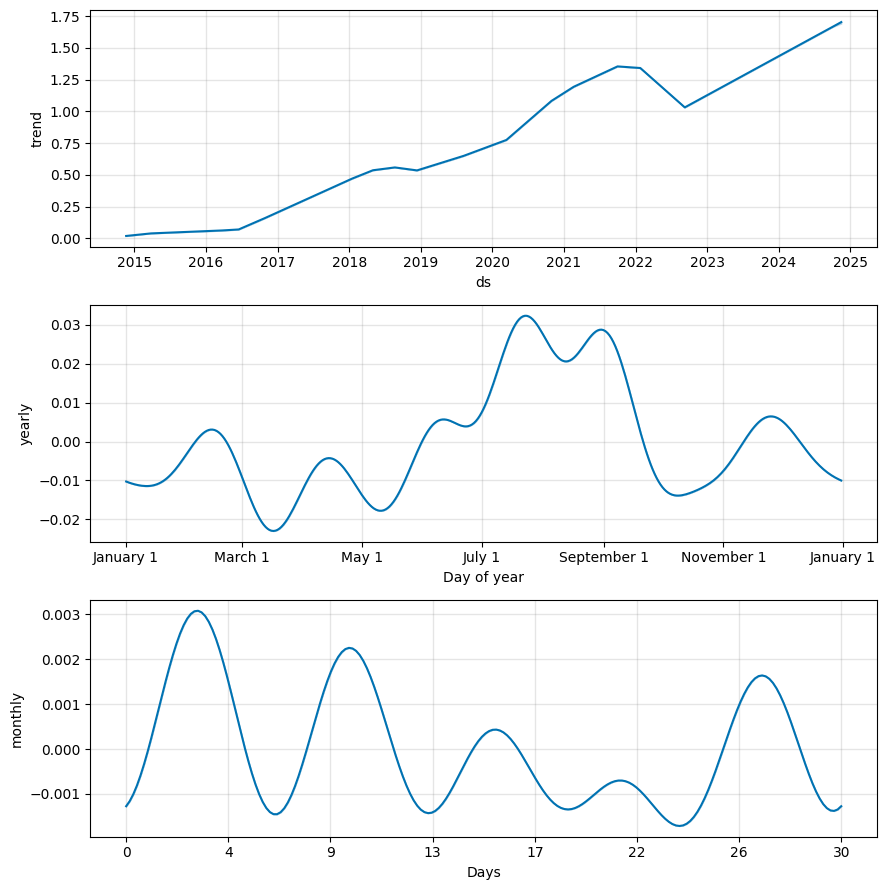

In [49]:
m.plot_components(df2)

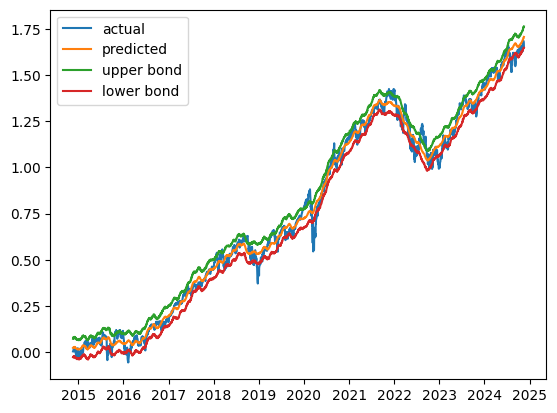

In [50]:
plt.plot(df2.ds, df2.QQQ, label='actual')
plt.plot(df2.ds, df2.yhat, label='predicted')
plt.plot(df2.ds, df2.yhat_upper, label='upper bond')
plt.plot(df2.ds, df2.yhat_lower, label='lower bond')
plt.legend()

In [51]:
df = pd.DataFrame()
df['ds'] = rets['Adj Close'].QQQ.index[:-5]
df['y'] = rets['Adj Close'].QQQ.values.cumsum()[:-5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2510 non-null   datetime64[ns]
 1   y       2510 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.3 KB


In [52]:
m = Prophet(changepoint_prior_scale = 0.05,
            weekly_seasonality = False,
            daily_seasonality = False,
            yearly_seasonality = True,
            changepoints = None)
m.add_seasonality(name='monthly',period=30.5,fourier_order=5)
m.fit(df)

17:51:27 - cmdstanpy - INFO - Chain [1] start processing
17:51:27 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future = m.make_future_dataframe(periods=5,freq='B')
future.tail()

ds
2510 2024-11-12
2511 2024-11-13
2512 2024-11-14
2513 2024-11-15
2514 2024-11-18

In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
2510 2024-11-12  1.692906    1.645292    1.742229
2511 2024-11-13  1.693628    1.645090    1.742841
2512 2024-11-14  1.695688    1.646751    1.746242
2513 2024-11-15  1.698596    1.646220    1.748483
2514 2024-11-18  1.702717    1.653986    1.753740

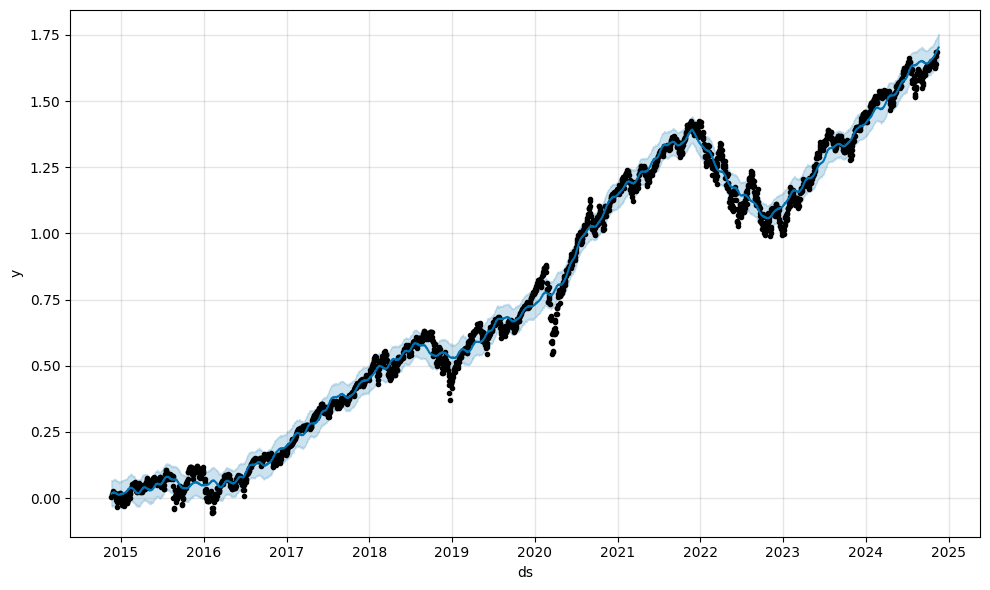

In [55]:
fig1 = m.plot(forecast)

In [56]:
df2 = pd.merge(rets['Adj Close'].QQQ.cumsum(), forecast, how='inner', right_on='ds', left_index=True)
df2

QQQ         ds     trend  yhat_lower  yhat_upper  trend_lower  \
0     0.004447 2014-11-20  0.017334   -0.029599    0.067274     0.017334   
1     0.006374 2014-11-21  0.017500   -0.029819    0.064801     0.017500   
2     0.014142 2014-11-24  0.017998   -0.032124    0.067180     0.017998   
3     0.015670 2014-11-25  0.018164   -0.026447    0.065435     0.018164   
4     0.022135 2014-11-26  0.018330   -0.030217    0.069278     0.018330   
...        ...        ...       ...         ...         ...          ...   
2510  1.682925 2024-11-12  1.696815    1.645292    1.742229     1.696815   
2511  1.681637 2024-11-13  1.697671    1.645090    1.742841     1.697671   
2512  1.674663 2024-11-14  1.698527    1.646751    1.746242     1.698527   
2513  1.650549 2024-11-15  1.699382    1.646220    1.748483     1.699382   
2514  1.657473 2024-11-18  1.701950    1.653986    1.753740     1.701950   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        0.017334       -0.000078             -0.000078             -0.000078   
1        0.017500        0.000538              0.000538              0.000538   
2        0.017998        0.000569              0.000569              0.000569   
3        0.018164        0.001411              0.001411              0.001411   
4        0.018330        0.002477              0.002477              0.002477   
...           ...             ...                   ...                   ...   
2510     1.696815       -0.003910             -0.003910             -0.003910   
2511     1.697671       -0.004043             -0.004043             -0.004043   
2512     1.698527       -0.002839             -0.002839             -0.002839   
2513     1.699382       -0.000787             -0.000787             -0.000787   
2514     1.701950        0.000767              0.000767              0.000767   

       monthly  monthly_lower  monthly_upper    yearly  yearly_lower  \
0    -0.000958      -0.000958      -0.000958  0.000880      0.000880   
1    -0.000729      -0.000729      -0.000729  0.001267      0.001267   
2    -0.001432      -0.001432      -0.001432  0.002001      0.002001   
3    -0.000689      -0.000689      -0.000689  0.002100      0.002100   
4     0.000350       0.000350       0.000350  0.002127      0.002127   
...        ...            ...            ...       ...           ...   
2510 -0.000005      -0.000005      -0.000005 -0.003904     -0.003904   
2511 -0.000928      -0.000928      -0.000928 -0.003115     -0.003115   
2512 -0.000477      -0.000477      -0.000477 -0.002361     -0.002361   
2513  0.000863       0.000863       0.000863 -0.001650     -0.001650   
2514  0.000594       0.000594       0.000594  0.000173      0.000173   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         0.000880                   0.0                         0.0   
1         0.001267                   0.0                         0.0   
2         0.002001                   0.0                         0.0   
3         0.002100                   0.0                         0.0   
4         0.002127                   0.0                         0.0   
...            ...                   ...                         ...   
2510     -0.003904                   0.0                         0.0   
2511     -0.003115                   0.0                         0.0   
2512     -0.002361                   0.0                         0.0   
2513     -0.001650                   0.0                         0.0   
2514      0.000173                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  0.017256  
1                            0.0  0.018038  
2                            0.0  0.018567  
3                            0.0  0.019575  
4                            0.0  0.020807  
...                          ...       ...  
2510                         0.0  1.692906  
2511                         0.0  1

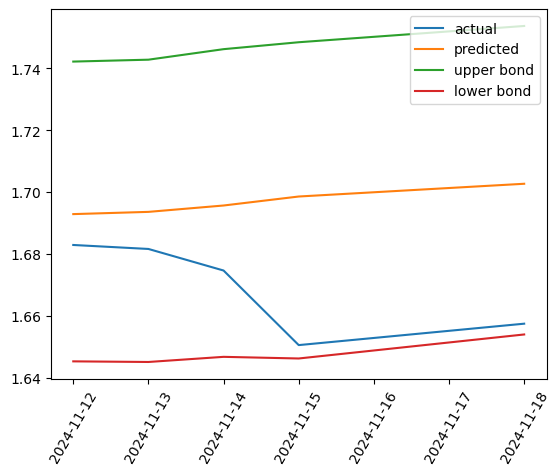

In [57]:
plt.plot(df2.ds[-5:], df2.QQQ[-5:], label='actual')
plt.plot(df2.ds[-5:], df2.yhat[-5:], label='predicted')
plt.plot(df2.ds[-5:], df2.yhat_upper[-5:], label='upper bond')
plt.plot(df2.ds[-5:], df2.yhat_lower[-5:], label='lower bond')
plt.xticks(rotation=60)
plt.legend()

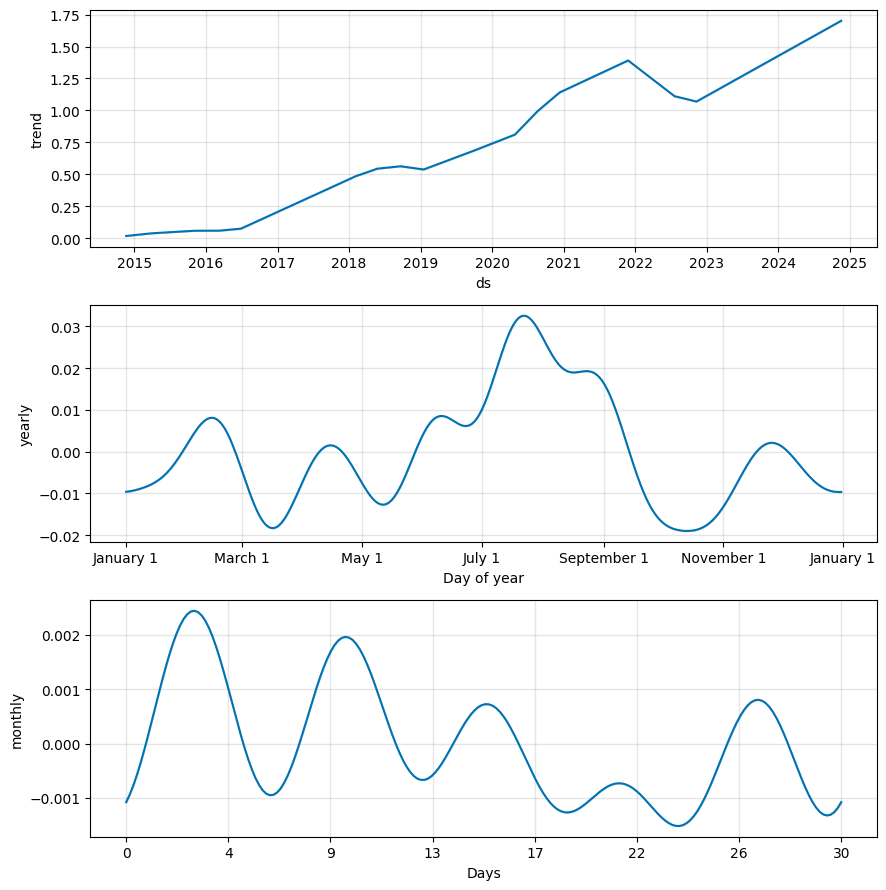

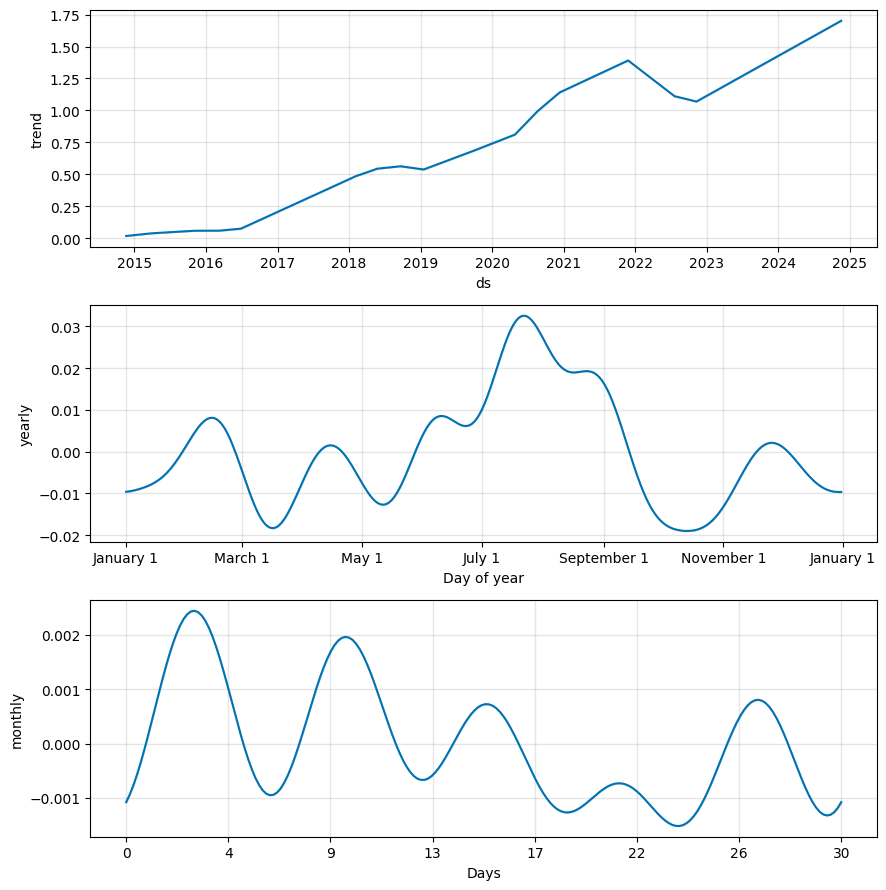

In [58]:
m.plot_components(df2)

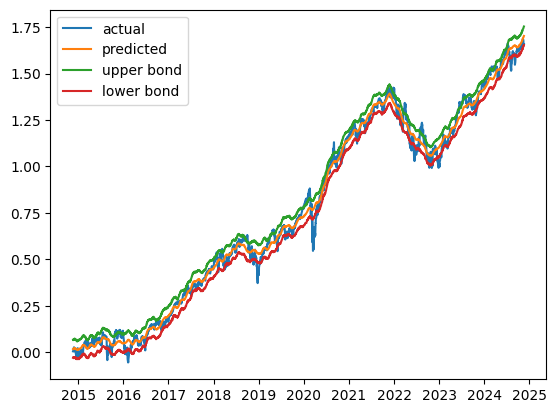

In [59]:
plt.plot(df2.ds, df2.QQQ, label='actual')
plt.plot(df2.ds, df2.yhat, label='predicted')
plt.plot(df2.ds, df2.yhat_upper, label='upper bond')
plt.plot(df2.ds, df2.yhat_lower, label='lower bond')
plt.legend()

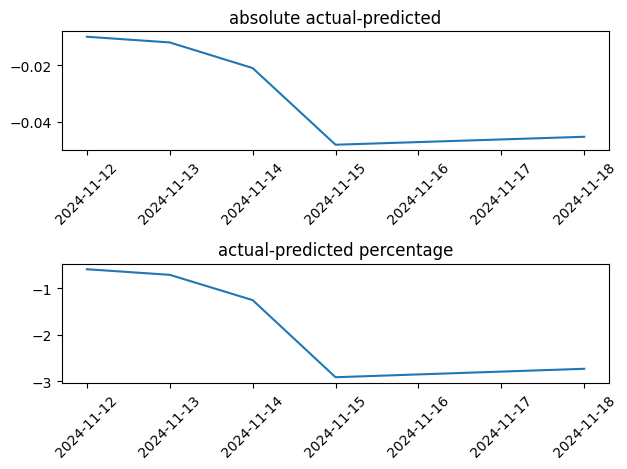

In [60]:
fig, ax = plt.subplots(2,1)
labels=df2.ds[-5:]
ax[0].plot(df2.ds[-5:], df2.QQQ[-5:]-df2.yhat[-5:], label='actual-predicted')
ax[0].set_title('absolute actual-predicted')
ax[0].tick_params('x',labelrotation=45)

ax[1].plot(df2.ds[-5:], (df2.QQQ[-5:]-df2.yhat[-5:])/df2.QQQ[-5:] *100, label='actual-predicted %')
ax[1].set_title('actual-predicted percentage')
ax[1].tick_params('x',labelrotation=45)
fig.tight_layout()


Exclude COVID period

In [61]:
df = pd.DataFrame()
df['ds'] = rets.loc['2021-01-04':]['Adj Close'].QQQ.index[:-20]
df['y'] = rets.loc['2021-01-04':]['Adj Close'].QQQ.values.cumsum()[:-20]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      956 non-null    datetime64[ns]
 1   y       956 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.1 KB


In [62]:
m = Prophet(changepoint_prior_scale = 0.05,
            weekly_seasonality = False,
            daily_seasonality = False,
            yearly_seasonality = True,
            changepoints = None)
m.add_seasonality(name='monthly',period=20,fourier_order=5)
m.fit(df)

17:51:30 - cmdstanpy - INFO - Chain [1] start processing
17:51:30 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = m.make_future_dataframe(periods=60,freq='B')
future.tail()

ds
1011 2025-01-07
1012 2025-01-08
1013 2025-01-09
1014 2025-01-10
1015 2025-01-13

In [64]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1011 2025-01-07  0.558575    0.513927    0.608434
1012 2025-01-08  0.551227    0.508615    0.597758
1013 2025-01-09  0.545947    0.498354    0.592042
1014 2025-01-10  0.548845    0.502892    0.596299
1015 2025-01-13  0.557982    0.511198    0.606817

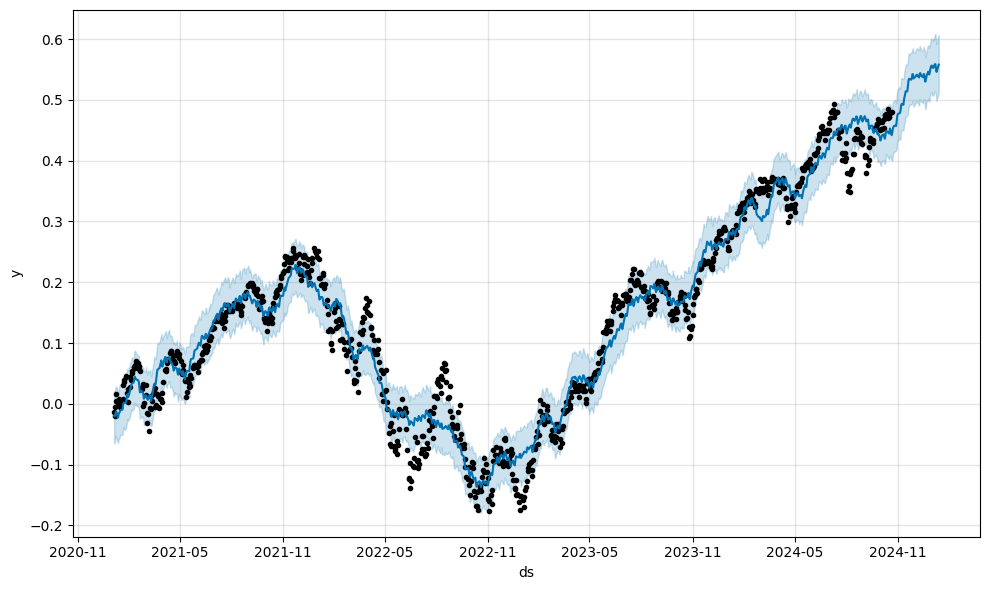

In [65]:
fig1 = m.plot(forecast)

In [66]:
df2 = pd.merge(rets.loc['2021-01-04':]['Adj Close'].QQQ.cumsum(), forecast, how='inner', right_on='ds', left_index=True)
df2

QQQ         ds     trend  yhat_lower  yhat_upper  trend_lower  \
0   -0.014221 2021-01-04 -0.021022   -0.061918    0.021049    -0.021022   
1   -0.006010 2021-01-05 -0.020245   -0.065386    0.021187    -0.020245   
2   -0.019959 2021-01-06 -0.019468   -0.057546    0.024493    -0.019468   
3    0.003945 2021-01-07 -0.018691   -0.052452    0.028111    -0.018691   
4    0.016721 2021-01-08 -0.017914   -0.055959    0.028754    -0.017914   
..        ...        ...       ...         ...         ...          ...   
971  0.514884 2024-11-12  0.511302    0.457379    0.540896     0.509938   
972  0.513596 2024-11-13  0.512056    0.463015    0.548791     0.510476   
973  0.506622 2024-11-14  0.512811    0.465093    0.551499     0.510942   
974  0.482508 2024-11-15  0.513565    0.472908    0.558415     0.511532   
975  0.489431 2024-11-18  0.515829    0.474177    0.557989     0.513402   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      -0.021022        0.001774              0.001774              0.001774   
1      -0.020245       -0.000514             -0.000514             -0.000514   
2      -0.019468        0.001223              0.001223              0.001223   
3      -0.018691        0.005682              0.005682              0.005682   
4      -0.017914        0.004734              0.004734              0.004734   
..           ...             ...                   ...                   ...   
971     0.511839       -0.011079             -0.011079             -0.011079   
972     0.512698       -0.006922             -0.006922             -0.006922   
973     0.513640       -0.003776             -0.003776             -0.003776   
974     0.514556        0.000481              0.000481              0.000481   
975     0.517016       -0.001903             -0.001903             -0.001903   

      monthly  monthly_lower  monthly_upper    yearly  yearly_lower  \
0    0.000417       0.000417       0.000417  0.001357      0.001357   
1   -0.001711      -0.001711      -0.001711  0.001197      0.001197   
2    0.000240       0.000240       0.000240  0.000984      0.000984   
3    0.004954       0.004954       0.004954  0.000728      0.000728   
4    0.004290       0.004290       0.004290  0.000443      0.000443   
..        ...            ...            ...       ...           ...   
971 -0.001774      -0.001774      -0.001774 -0.009305     -0.009305   
972 -0.000066      -0.000066      -0.000066 -0.006855     -0.006855   
973  0.000665       0.000665       0.000665 -0.004441     -0.004441   
974  0.002566       0.002566       0.002566 -0.002085     -0.002085   
975 -0.006308      -0.006308      -0.006308  0.004405      0.004405   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0        0.001357                   0.0                         0.0   
1        0.001197                   0.0                         0.0   
2        0.000984                   0.0                         0.0   
3        0.000728                   0.0                         0.0   
4        0.000443                   0.0                         0.0   
..            ...                   ...                         ...   
971     -0.009305                   0.0                         0.0   
972     -0.006855                   0.0                         0.0   
973     -0.004441                   0.0                         0.0   
974     -0.002085                   0.0                         0.0   
975      0.004405                   0.0                         0.0   

     multiplicative_terms_upper      yhat  
0                           0.0 -0.019248  
1                           0.0 -0.020759  
2                           0.0 -0.018245  
3                           0.0 -0.013010  
4                           0.0 -0.013181  
..                          ...       ...  
971                         0.0  0.500222  
972                         0.0  0.505135  
973                         0.0  0.509035  
97

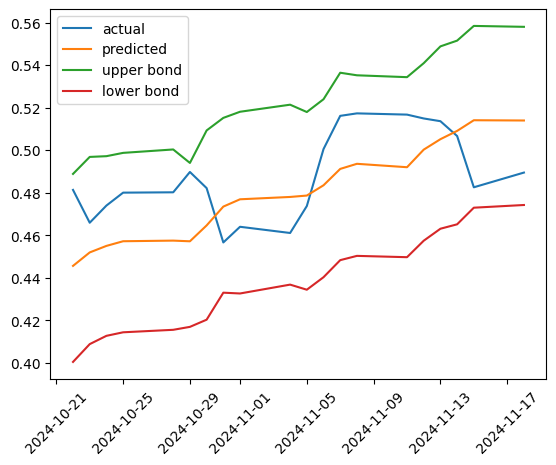

In [67]:
plt.plot(df2.ds[-20:], df2.QQQ[-20:], label='actual')
plt.plot(df2.ds[-20:], df2.yhat[-20:], label='predicted')
plt.plot(df2.ds[-20:], df2.yhat_upper[-20:], label='upper bond')
plt.plot(df2.ds[-20:], df2.yhat_lower[-20:], label='lower bond')
plt.xticks(rotation=45)
plt.legend()

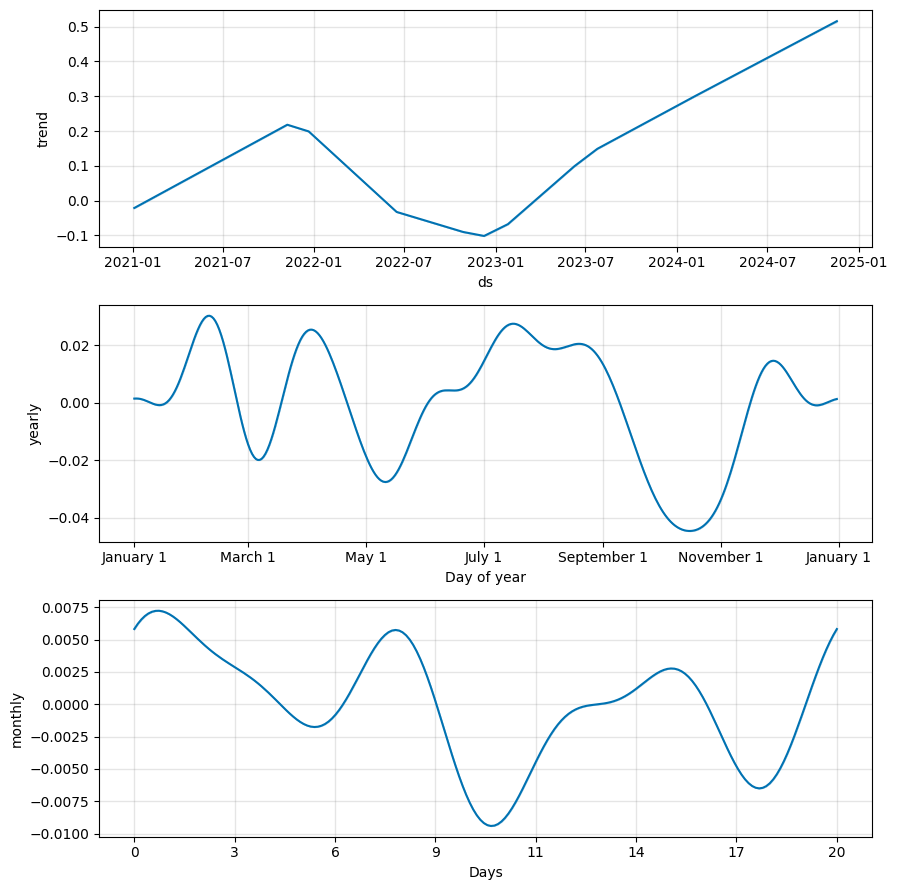

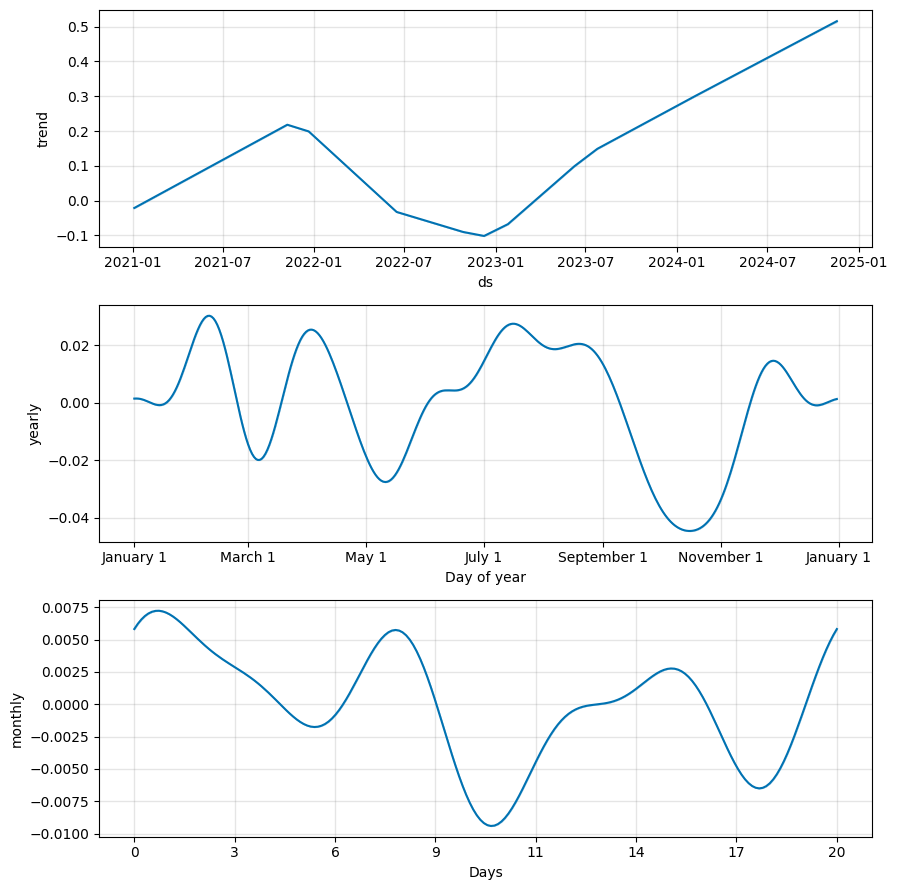

In [68]:
m.plot_components(df2)

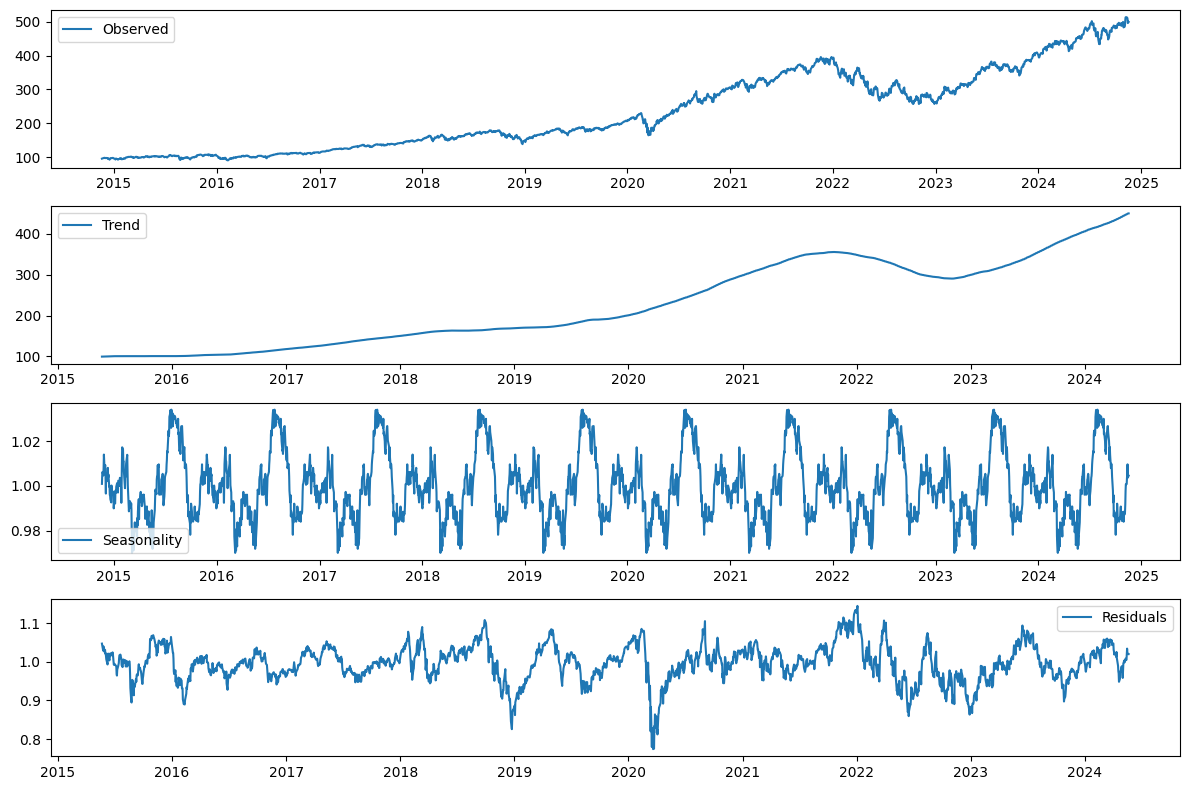

In [69]:
# Decompose the time series for QQQ
decomposition = seasonal_decompose(data['Adj Close']['QQQ'], model='multiplicative', period=252)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

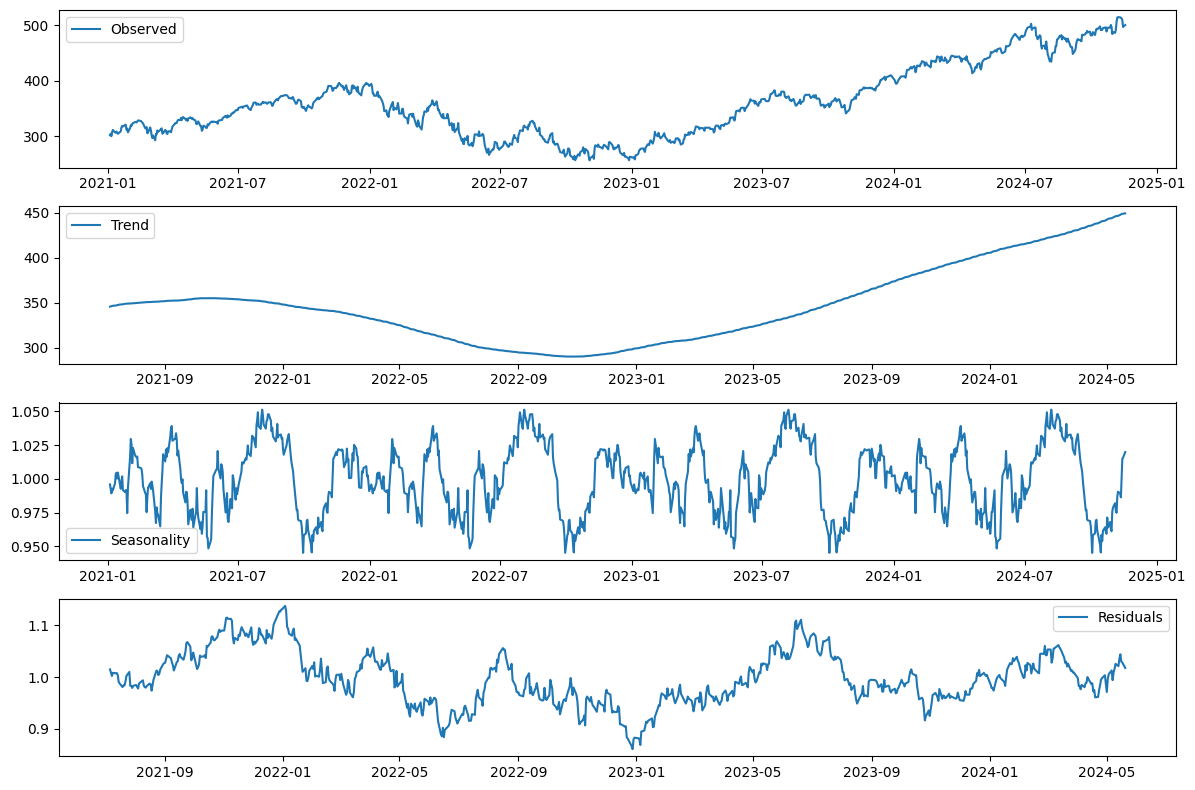

In [70]:
# Decompose the time series for QQQ
decomposition = seasonal_decompose(data.loc['2021-01-04':]['Adj Close']['QQQ'], model='multiplicative', period=252)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

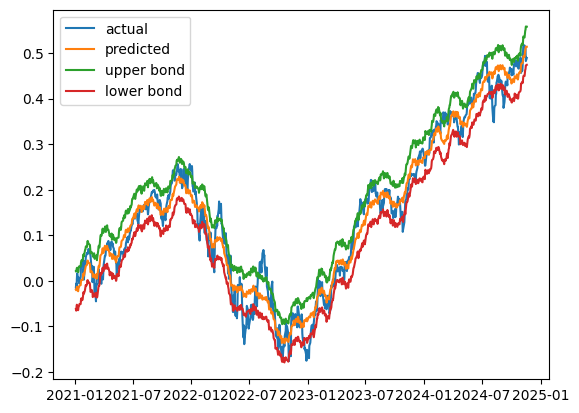

In [71]:
plt.plot(df2.ds, df2.QQQ, label='actual')
plt.plot(df2.ds, df2.yhat, label='predicted')
plt.plot(df2.ds, df2.yhat_upper, label='upper bond')
plt.plot(df2.ds, df2.yhat_lower, label='lower bond')
plt.legend()

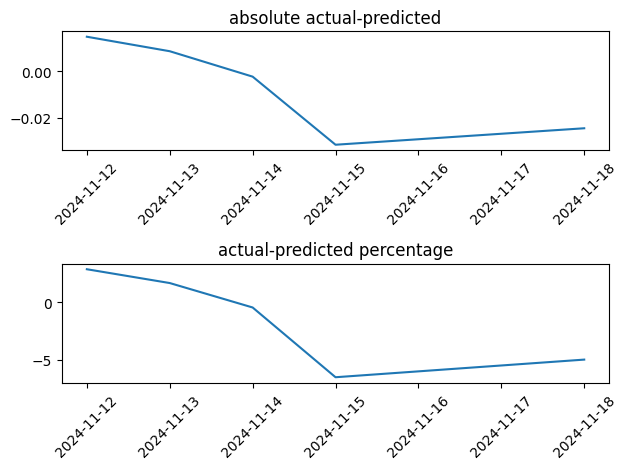

In [72]:
fig, ax = plt.subplots(2,1)
labels=df2.ds[-5:]
ax[0].plot(df2.ds[-5:], df2.QQQ[-5:]-df2.yhat[-5:], label='actual-predicted')
ax[0].set_title('absolute actual-predicted')
ax[0].tick_params('x',labelrotation=45)

ax[1].plot(df2.ds[-5:], (df2.QQQ[-5:]-df2.yhat[-5:])/df2.QQQ[-5:] *100, label='actual-predicted %')
ax[1].set_title('actual-predicted percentage')
ax[1].tick_params('x',labelrotation=45)
fig.tight_layout()


## ARIMA

In [90]:
rc = data['Adj Close'].QQQ.copy().loc['2021-01-04':][:-20]
rc = rc.asfreq('B')

In [91]:
# Fit ARIMA model

mod = ARIMA(rc, order=(2,1,1))
mod_fit = mod.fit()

/home/florencia/anaconda3/envs/fsa_v2_lib/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/florencia/anaconda3/envs/fsa_v2_lib/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



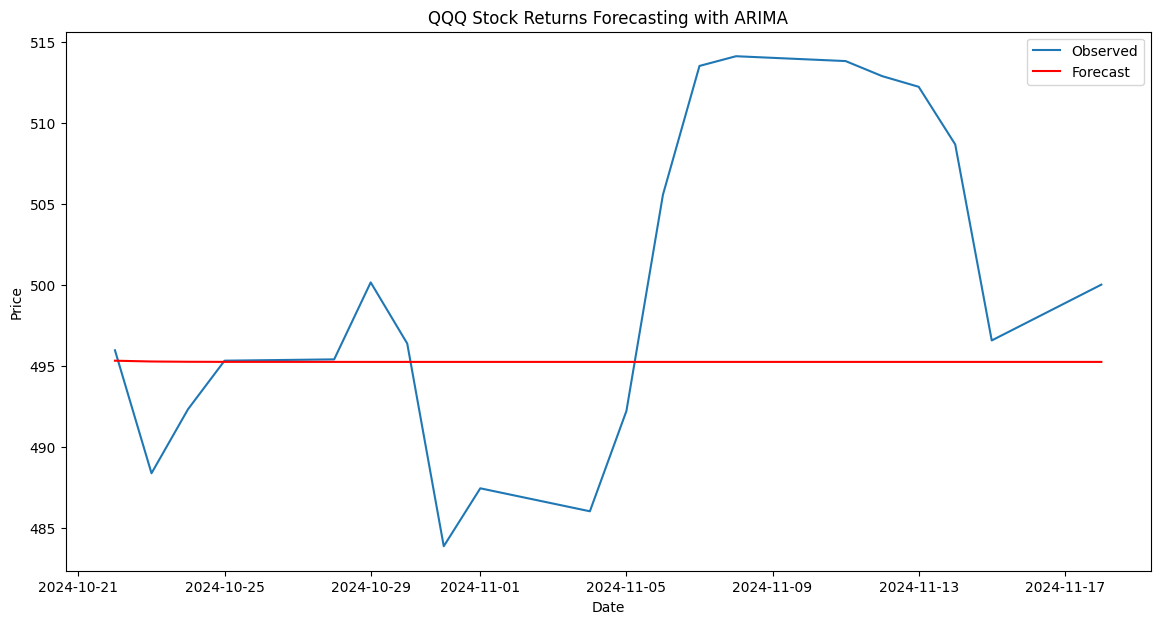

In [92]:
# Forecast the next 20 days
forecast = mod_fit.forecast(steps=20)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'].QQQ.copy()[-20:], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('QQQ Stock Returns Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('AAPL_ARIMA.png')

plt.show()

In [93]:
# Calculate the performance metrics
mse = mean_squared_error(data['Adj Close'].QQQ.copy()[-20:], forecast)
mae = mean_absolute_error(data['Adj Close'].QQQ.copy()[-20:], forecast)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 115.93569250059393
Mean Absolute Error: 8.429203446182228
